# US Tech Company Stats

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.express import *
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Tech-Companies2022-2023.csv')
df.head(10)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


## Processing and Cleaning 

In [3]:
df.isnull().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

### Rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names

In [4]:
df.rename(columns={'Company Name':'Company','Founding Year':'Founding','Annual Revenue 2022-2023 (USD in Billions)':'Revenue_USD','Market Cap (USD in Trillions)':'MarketCap_with_Trillions','Annual Income Tax in 2022-2023 (USD in Billions)':'Annual_Income_Tax_in_Billions','Employee Size':'Employee','Stock Name':'Stock_Name'}, inplace=True)
df.columns

Index(['Company', 'Industry', 'Sector', 'HQ State', 'Founding', 'Revenue_USD',
       'MarketCap_with_Trillions', 'Stock_Name',
       'Annual_Income_Tax_in_Billions', 'Employee'],
      dtype='object')

# Data Wringling

In [5]:
df.head().info

<bound method DataFrame.info of                  Company    Industry                   Sector    HQ State  \
0             Apple Inc.  Technology     Consumer Electronics  California   
1  Microsoft Corporation  Technology  Software Infrastructure  Washington   
2      Alphabet (Google)  Technology  Software Infrastructure  California   
3                 Amazon  Technology     Software Application  Washington   
4     NVIDIA Corporation  Technology           Semiconductors  California   

   Founding  Revenue_USD  MarketCap_with_Trillions Stock_Name  \
0      1976       387.53                     2.520       AAPL   
1      1975       204.09                     2.037       MSFT   
2      1998       282.83                     1.350       GOOG   
3      1994       513.98                     1.030       AMZN   
4      1993        26.97                     0.653       NVDA   

   Annual_Income_Tax_in_Billions  Employee  
0                         18.314    164000  
1                       

In [6]:
df.describe()

,Founding,Revenue_USD,MarketCap_with_Trillions,Annual_Income_Tax_in_Billions,Employee
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


In [7]:
df.shape

(50, 10)

### Extracting profits (Annual Revenue 2022-2023 (USD in Billions)) for this Tech Companies

In [8]:
df.head(10)

,Company,Industry,Sector,HQ State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


### Compare the trend of top 12 companies that contributed the most Revenue With US Dollars

In [9]:
inplace = True 
df.sort_values(by=['Revenue_USD'], ascending=False, axis=0, inplace=True)
df.head()

,Company,Industry,Sector,HQ State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482


<Axes: xlabel='Revenue_USD', ylabel='Company'>

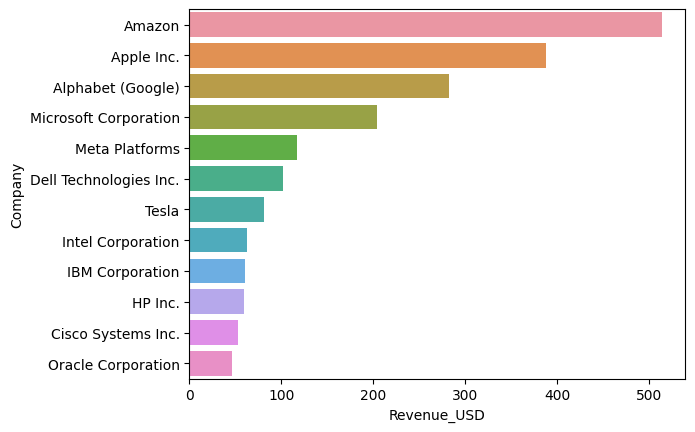

In [10]:
sns.barplot(data=df.head(12), x="Revenue_USD", y="Company")

### Numbers of Employees for the first 6 Companies in DataFrame

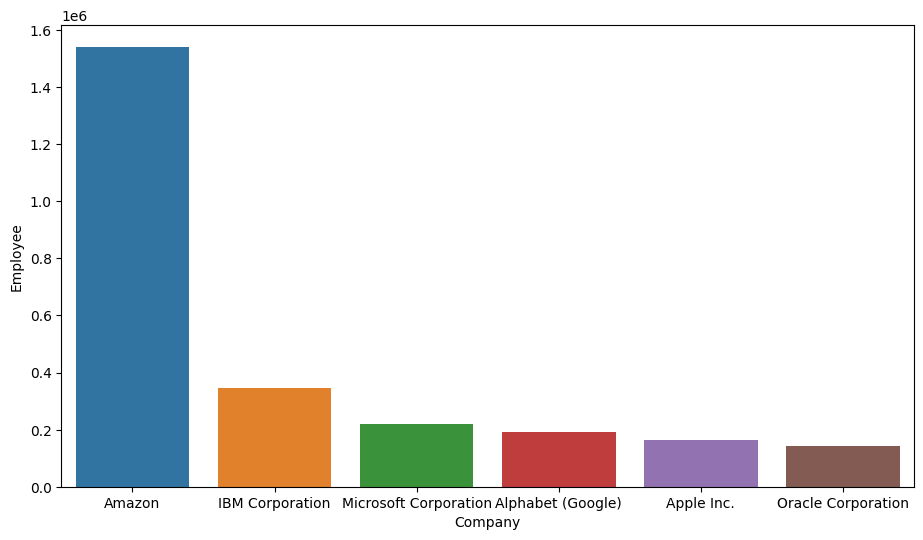

In [11]:
df.sort_values(by='Employee', ascending=False, inplace=True)

plt.figure(figsize=(11, 6))
sns.barplot(x='Company', y='Employee', data=df.head(6))
plt.show()


### Another Compare the trend of top 10 companies that contributed the most MarketCap with Trillions¶

In [12]:
inplace = True 
df.sort_values(by=['MarketCap_with_Trillions'], ascending=False, axis=0, inplace=True)
df.head(10)

,Company,Industry,Sector,HQ State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


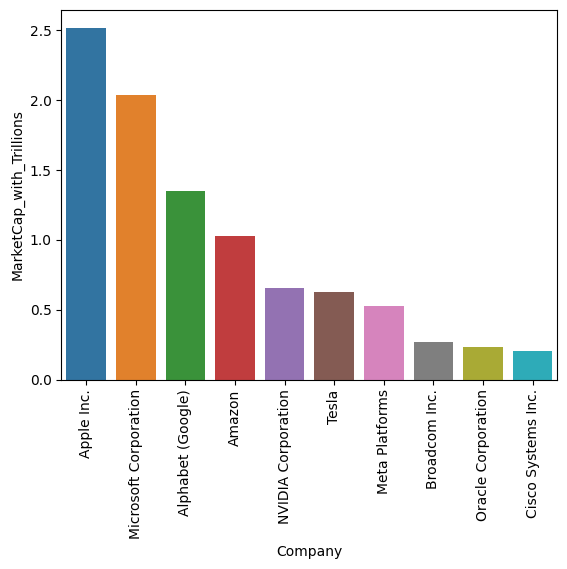

In [13]:
sns.barplot(x='Company', y='MarketCap_with_Trillions', data=df.head(10))
plt.xticks(rotation=90)
plt.show()

# Regression mode

##### Befor Creating A regression Model we convert target columns from object to float using sklearn

In [14]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# encode the categorical columns
df['Company'] = le.fit_transform(df['Company'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Sector'] = le.fit_transform(df['Sector'])
df['HQ State'] = le.fit_transform(df['HQ State'])
df['Stock_Name'] = le.fit_transform(df['Stock_Name'])


In [15]:
print(df['MarketCap_with_Trillions'].dtype)


float64


In [16]:
df = df.dropna()


#### Define independent and dependent variables

In [17]:
X = df[['Founding', 'Revenue_USD', 'MarketCap_with_Trillions', 'Annual_Income_Tax_in_Billions', 'Employee']]
y = df['Stock_Name']

In [18]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Creating a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Make predictions and Evaluate the performance of the model using the R-squared metric

In [20]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: -1.347091811658872


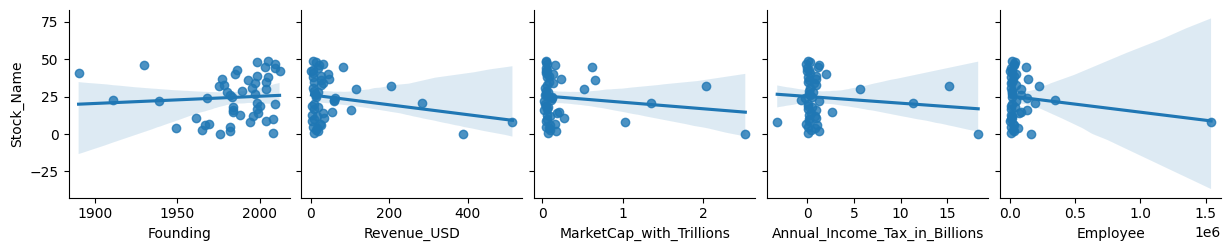

In [21]:
sns.pairplot(data=df, x_vars=['Founding', 'Revenue_USD', 'MarketCap_with_Trillions', 'Annual_Income_Tax_in_Billions', 'Employee'], y_vars=['Stock_Name'], kind='reg')
plt.show()
